# Day 13

## Part 1

- Find the mirror lines
- The answer is the number of cols to the left of a vertical mirror line plus 100 times the number of rows above a horizontal one.
- Find the sum of all patterns

In [48]:
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

from advent_of_code_utils.advent_of_code_utils import (
    ParseConfig, parse_from_file, markdown
)


In [49]:
ASH = 0
ROCK = 1

def encode_tiles(tile: str) -> int:
    """converts a tile to an integer"""
    match tile:
        case '.':
            return ASH
        case '#':
            return ROCK
        case _:
            raise ValueError(f'{tile=} is not recognised!')
        
parser = ParseConfig('\n\n', ParseConfig('\n', ParseConfig('', encode_tiles)))

grids = parse_from_file('puzzle_input\\day_13.txt', parser)

Text(0.5, 0.98, 'Good griddance!')

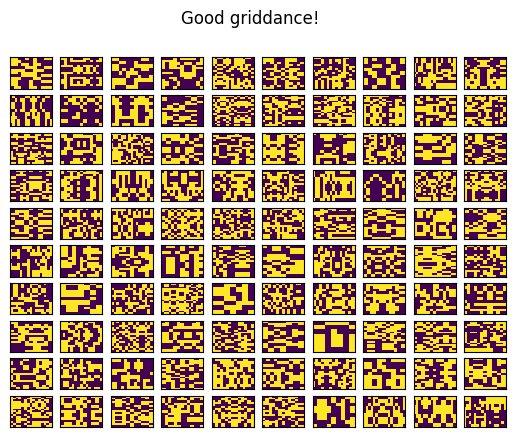

In [50]:
# lets plot some grids!
def plot_grid(grid: list[list[int]], ax: plt.Axes) -> None:
    """plots a single grid on the axis provided"""
    ax.pcolormesh(np.flipud(grid))
    ax.set_xticks([])
    ax.set_yticks([])

fig, _ = plt.subplots(nrows=10, ncols=10)
for index, (ax, grid) in enumerate(zip(fig.axes, grids), start=1):
    plot_grid(grid, ax)
fig.suptitle('Good griddance!')

In [51]:
# ok now to get solving - we'll do it by converting each set of rows to a list
# of numbers and then finding patterns in those

def find_mirror(grid: list[list[int]], debug: bool = False) -> tuple[int, int]:
    """returns the axis and location of the grid's mirror line"""
    # horizontal
    h_numerics = [
        int(''.join(str(tile) for tile in row), 2) for row in grid
    ]
    if debug:
        print(f'{h_numerics=}')

    # find a vertical mirror
    for index, (a, b) in \
            enumerate(zip(h_numerics[:-1], h_numerics[1:]), start=1):
        if a == b:
            if all([
                c == d for c, d in zip(
                reversed(h_numerics[:index-1]), h_numerics[index+1:]
            )]):
                return (0, index)

    v_numerics = [
        int(''.join(str(tile) for tile in row), 2)
        for row in np.transpose(grid)
    ]
    if debug:
        print(f'{v_numerics=}')
    
    # find a horizontal mirror
    for index, (a, b) in \
            enumerate(zip(v_numerics[:-1], v_numerics[1:]), start=1):
        if a == b:
            if all([
                c == d for c, d in zip(
                reversed(v_numerics[:index-1]), v_numerics[index+1:]
            )]):
                return (1, index)
    
    raise ValueError(f'could not find a mirror!')

mirror_lines = []
for grid in tqdm(grids):
    mirror_lines.append(find_mirror(grid))

100%|██████████| 100/100 [00:00<00:00, 7368.12it/s]


Text(0.5, 0.98, 'All lined up')

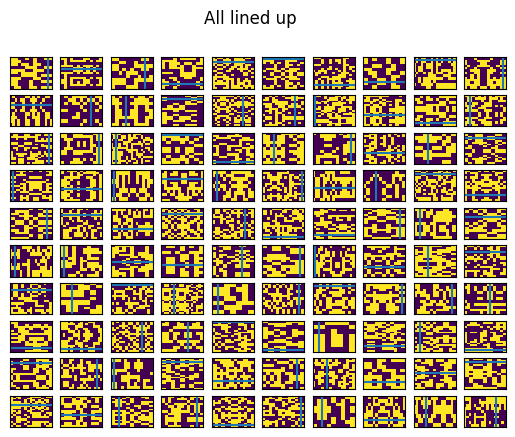

In [53]:
fig, _ = plt.subplots(nrows=10, ncols=10)
for index, (ax, grid, mirror) in \
        enumerate(zip(fig.axes, grids, mirror_lines), start=1):
    plot_grid(grid, ax)
    axis, index = mirror
    # horizontal
    if axis == 0:
        limits = ax.get_xlim()
        # Flip the index because we flip the grid to plot
        ax.plot(limits, [len(grid) - index]*2)
        ax.set_xlim(limits)
    # vertical
    else:
        limits = ax.get_ylim()
        ax.plot([index]*2, limits)
        ax.set_ylim(limits)

fig.suptitle('All lined up')

In [54]:
# nice, now let's find the answer
mirror_line_total = 0
for axis, index in mirror_lines:
    if axis == 0:
        mirror_line_total += index * 100
    else:
        mirror_line_total += index

In [55]:
markdown(
    '### Solution',
    f'The total summarised mirror total is: {mirror_line_total}'
)

### Solution
The total summarised mirror total is: 33735

## Part 2

- Every mirror has a smudge that means a single tile is supposed to be inverted
- Fix the smudge and find the new mirror lines and re-tot-up the summary values

In [58]:
from copy import deepcopy

In [96]:
# the part 1 func needed tweaking so it would skip over an existing solution
# some of the grids still had the original mirror line even with the change
# and were finding the old solution first.
def find_mirror_exclude(
    grid: list[list[int]], existing: tuple[int, int] ,debug: bool = False
) -> tuple[int, int]:
    """
    returns the axis and location of the grid's new mirror line ignoring the
    existing one passed
    """
    axis, existing_index = existing

    # horizontal
    h_numerics = [
        int(''.join(str(tile) for tile in row), 2) for row in grid
    ]
    if debug:
        print(f'{h_numerics=}')

    # find a vertical mirror
    for index, (a, b) in \
            enumerate(zip(h_numerics[:-1], h_numerics[1:]), start=1):
        # skip existing vertical mirror
        if axis == 0 and index == existing_index:
            continue
        if a == b:
            if all([
                c == d for c, d in zip(
                reversed(h_numerics[:index-1]), h_numerics[index+1:]
            )]):
                return (0, index)

    v_numerics = [
        int(''.join(str(tile) for tile in row), 2)
        for row in np.transpose(grid)
    ]
    if debug:
        print(f'{v_numerics=}')
    
    # find a horizontal mirror
    for index, (a, b) in \
            enumerate(zip(v_numerics[:-1], v_numerics[1:]), start=1):
        # skip existing horizontal mirror
        if axis == 1 and index == existing_index:
            continue
        if a == b:
            if all([
                c == d for c, d in zip(
                reversed(v_numerics[:index-1]), v_numerics[index+1:]
            )]):
                return (1, index)
    
    raise ValueError(f'could not find a mirror!')

In [98]:
# let's just try doing this brute force
smudged_lines = []
for grid, old_line in tqdm(zip(grids, mirror_lines)):
    new_found = False
    for n_row, row in enumerate(grid):
        for n_col, value in enumerate(row):
            temp = deepcopy(grid)
            if value == ASH:
                temp[n_row][n_col] = ROCK
            else:
                temp[n_row][n_col] = ASH
            # see if we can find a valid line
            try:
                new_line = find_mirror_exclude(temp, old_line)
            except ValueError:
                continue

            smudged_lines.append(new_line)
            new_found = True
            break
        if new_found:
            break
    if not new_found:
        smudged_lines.append((None, 0))
            

100it [00:02, 37.39it/s]


Text(0.5, 0.98, 'Time to reflect on things')

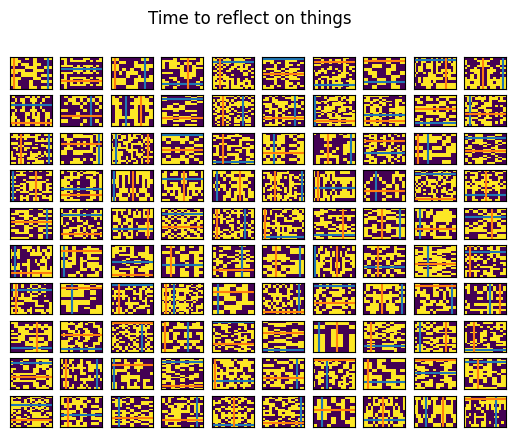

In [100]:
fig, _ = plt.subplots(nrows=10, ncols=10)
for index, (ax, grid, mirror, smudge) in \
        enumerate(zip(fig.axes, grids, mirror_lines, smudged_lines), start=1):
    plot_grid(grid, ax)
    axis, index = mirror
    # horizontal
    if axis == 0:
        limits = ax.get_xlim()
        # Flip the index because we flip the grid to plot
        ax.plot(limits, [len(grid) - index]*2)
        ax.set_xlim(limits)
    # vertical
    else:
        limits = ax.get_ylim()
        ax.plot([index]*2, limits)
        ax.set_ylim(limits)

    axis, index = smudge
    # horizontal
    if axis == 0:
        limits = ax.get_xlim()
        # Flip the index because we flip the grid to plot
        ax.plot(limits, [len(grid) - index]*2)
        ax.set_xlim(limits)
    # vertical
    elif axis == 1:
        limits = ax.get_ylim()
        ax.plot([index]*2, limits)
        ax.set_ylim(limits)
    else:
        pass

fig.suptitle('Time to reflect on things')

In [102]:
# nice, now let's find the answer
smudge_line_total = 0
for axis, index in smudged_lines:
    if axis == 0:
        smudge_line_total += index * 100
    else:
        smudge_line_total += index

markdown(
    '### Solution',
    f'The new summarised total accounting for smudges is: {smudge_line_total}'
)

### Solution
The new summarised total accounting for smudges is: 38063